<h1 align="center">Assignment 3</h1>

<p><strong>Nama:</strong> Muhammad Rinande Ansutia<br>
   <strong>No:</strong> PYTN-KS19-021</p>

## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or ('no') subscribed.

Input variables:

- Age (numeric)
- job: type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'illiterate', 'professional.course', 'university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**related with the last contact of the current campaign:**

- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**social and economic context attributes**

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Import Library

In [96]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Preprocessing

#### bank-additional-full.csv

In [12]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
# check type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# check nilai null
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak terdapat nilai null di datasest ini

In [16]:
# check duplicated data
df.duplicated().sum()

12

Karena terdapat 12 duplicated data, maka akan dibuang

In [17]:
# buang duplicated data
df.drop_duplicates(subset=df.columns, keep='last', inplace=True)
df.duplicated().sum()

0

### EDA

Periksa distribusi variabel target 'y' untuk memahami seimbang atau tidaknya antara kelas ('yes' dan 'no').

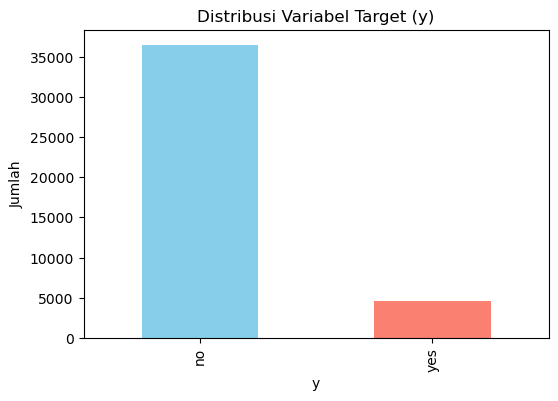

In [25]:
plt.figure(figsize=(6, 4))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Variabel Target (y)')
plt.xlabel('y')
plt.ylabel('Jumlah')
plt.show()

dapat ditarik kesimpulan,
1. Ketidakseimbangan Kelas:

    - Terlihat bahwa kelas 'no' (klien tidak berlangganan) lebih dominan dibandingkan dengan kelas 'yes' (klien berlangganan).
    - Distribusi ini menunjukkan adanya ketidakseimbangan dalam data target, di mana jumlah klien yang tidak berlangganan jauh lebih banyak dibandingkan dengan yang berlangganan.

2. Respon Langganan Rendah:

    - Proporsi klien yang berlangganan deposito (kelas 'yes') relatif lebih rendah dibandingkan dengan yang tidak berlangganan (kelas 'no').

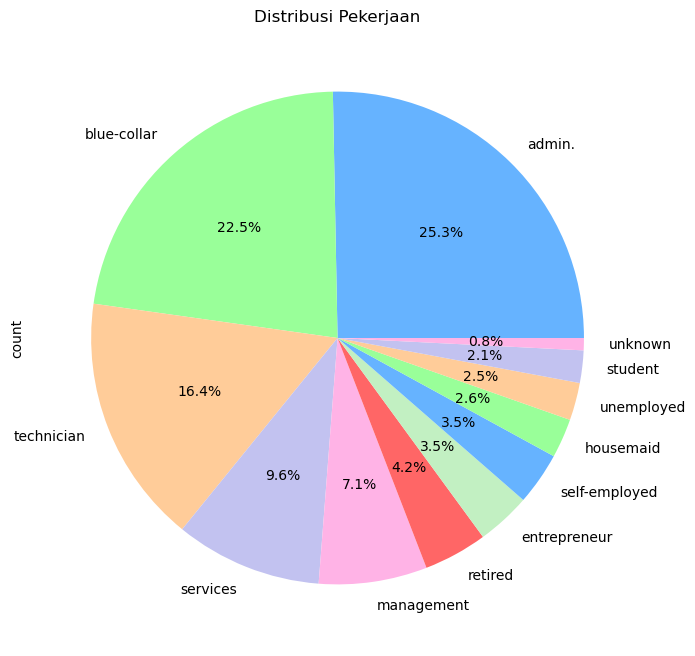

In [30]:
plt.figure(figsize=(10, 8))
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2'])
plt.title('Distribusi Pekerjaan')
plt.show()

Tampak bahwa top 5 pekerjaan yang paling banyak adalah: admin, blue-collar, technician, services dan management.

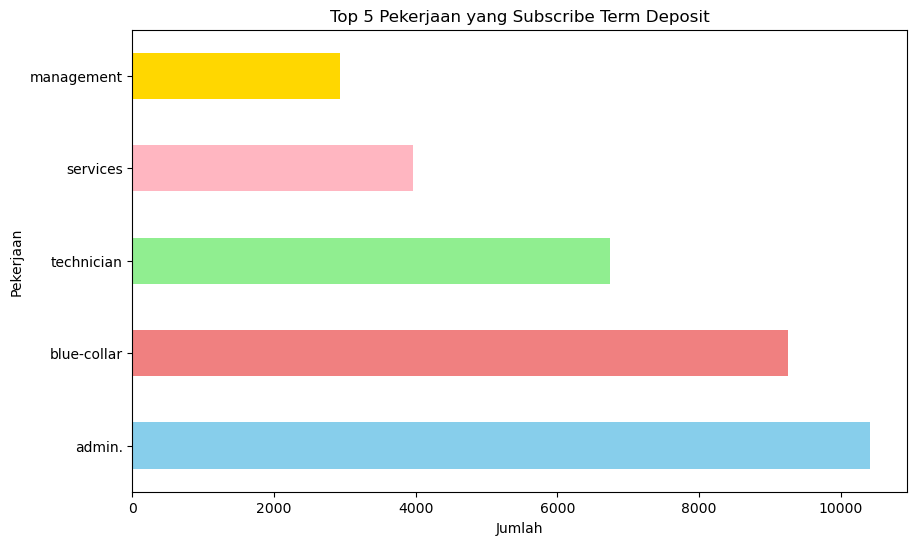

In [37]:
plt.figure(figsize=(10, 6))
df['job'].value_counts().head(5).plot(kind='barh', color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'gold'])
plt.title('Top 5 Pekerjaan yang Subscribe Term Deposit')
plt.xlabel('Jumlah')
plt.ylabel('Pekerjaan')
plt.show()


Tampak juga bahwa top 5 pekerjaan yang paling banyak subscribe term deposit adalah admin dan yang kedua terbanyak adalah blue-collar.

### Label Encoding

In [41]:
# Identifikasi kolom kategorikal dan boolean
categorical = df.select_dtypes(include=['object']).columns.tolist()
boolean = df.select_dtypes(include=['bool']).columns.tolist()

# Menggunakan LabelEncoder untuk mengubah data kategori ke data numerik
le = preprocessing.LabelEncoder()

# Mengubah data kategori ke data numerik pada DataFrame df
for col in categorical:
    df[col] = le.fit_transform(df[col])

# Mengubah data boolean ke data numerik pada DataFrame df
for col in boolean:
    df[col] = le.fit_transform(df[col])

#### Split Data

In [45]:
# Split data
train, test = train_test_split(df, test_size=0.25, random_state=11)

# Assign index directly
train_index = train.index
test_index = test.index

# Memilih kolom yang sesuai dengan kebutuhan Anda
features = ['age', 'job', 'marital', 'education', 'default', 'cons.price.idx',
            'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome']

# X_train dan X_test sesuai dengan fitur yang Anda pilih
X_train = train[features]
y_train = train['y']

X_test = test[features]
y_test = test['y']

In [49]:
print("{0:0.2f}% ada pada training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(X_test)/len(df.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


#### Scale Data

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Logistic Regression

In [51]:
# Create a logistic regression model
logreg_model = LogisticRegression(random_state=11)

# Fit the model to the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 90.65%

Confusion Matrix:
 [[8954  198]
 [ 764  378]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9152
           1       0.66      0.33      0.44      1142

    accuracy                           0.91     10294
   macro avg       0.79      0.65      0.69     10294
weighted avg       0.89      0.91      0.89     10294



Dapat dilihat bahwa,
* Akurasi (Accuracy): 90.65%
Akurasi mengukur sejauh mana model dapat memprediksi dengan benar. Dalam hal ini, sekitar 90.65% prediksi model benar.

* Precision: Menunjukkan seberapa banyak dari kelas yang diprediksi positif oleh model yang benar positif. Precision untuk kelas '1' (berlangganan) adalah 66%, yang mengindikasikan seberapa baik model memprediksi kelas tersebut.

* Recall: Menunjukkan seberapa banyak dari total instance yang termasuk dalam kelas yang diprediksi positif oleh model. Recall untuk kelas '1' adalah 33%, menunjukkan bahwa model tidak sebaik yang diharapkan dalam mengidentifikasi klien yang benar-benar berlangganan.

* F1-score: Menggabungkan precision dan recall menjadi satu nilai, di mana nilai tertinggi adalah 1. F1-score untuk kelas '1' adalah 0.44.

* Support: Jumlah instance yang termasuk dalam setiap kelas.

#### Visualisasi Confusion Matrix


Confusion Matrix:
 [[8954  198]
 [ 764  378]]


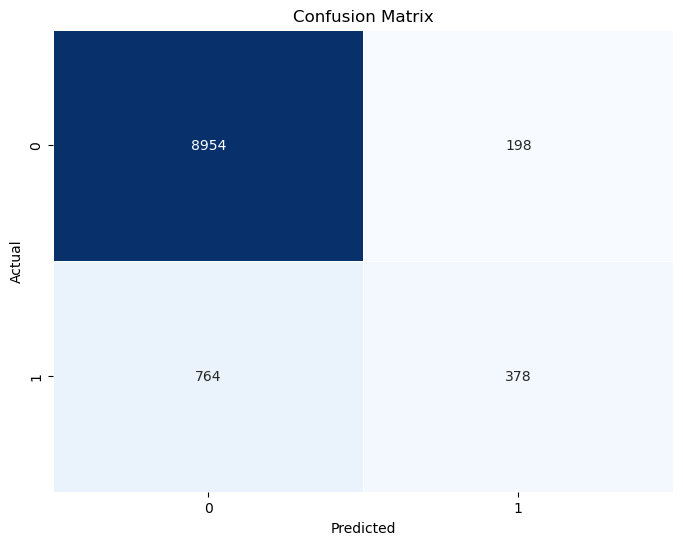

In [71]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

print("\nConfusion Matrix:\n", conf_matrix)

# Menambahkan label dan judul
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

* True Positive (TP): 378 (klien yang berlangganan dan diprediksi dengan benar)
* True Negative (TN): 8954 (klien yang tidak berlangganan dan diprediksi dengan benar)
* False Positive (FP): 198 (klien yang tidak berlangganan, tetapi diprediksi berlangganan)
* False Negative (FN): 764 (klien yang berlangganan, tetapi diprediksi tidak berlangganan)

#### Kesimpulan

1. Model memiliki akurasi yang cukup tinggi, yaitu sekitar 90.65%.
2.  Model cenderung lebih baik dalam memprediksi klien yang tidak berlangganan (kelas '0') dibandingkan dengan yang berlangganan (kelas '1').
3. Recall untuk kelas '1' (berlangganan) rendah, menunjukkan bahwa model kurang efektif dalam mengidentifikasi klien yang sebenarnya berlangganan.

## 2. KNN (K-Nearest Neighbors)

In [69]:
# Buat model KNN dengan jumlah tetangga (n_neighbors) tertentu
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model menggunakan data pelatihan yang telah di-scaled
knn_model.fit(X_train_scaled, y_train)

# Lakukan prediksi pada set data uji
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Tampilkan hasil evaluasi
print(f"Accuracy (KNN): {accuracy_knn * 100:.2f}%")
print("\nConfusion Matrix (KNN):\n", conf_matrix_knn)
print("\nClassification Report (KNN):\n", class_report_knn)

Accuracy (KNN): 90.00%

Confusion Matrix (KNN):
 [[8855  297]
 [ 732  410]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9152
           1       0.58      0.36      0.44      1142

    accuracy                           0.90     10294
   macro avg       0.75      0.66      0.69     10294
weighted avg       0.89      0.90      0.89     10294



Terlihat bahwa,
1. Akurasi (Accuracy) KNN: 90.00%.
Akurasi mengukur sejauh mana model KNN dapat memprediksi dengan benar. Dalam hal ini, sekitar 90.00% prediksi model benar.
2. Precision: 58% untuk kelas '1' (berlangganan), yang mengindikasikan seberapa baik model KNN memprediksi kelas tersebut.
3. Recall: 36% untuk kelas '1', menunjukkan bahwa model KNN kurang efektif dalam mengidentifikasi klien yang sebenarnya berlangganan.
4. F1-score: 44% untuk kelas '1'.

#### Visualisasi Confussion Matrix


Confusion Matrix (KNN):
 [[8855  297]
 [ 732  410]]


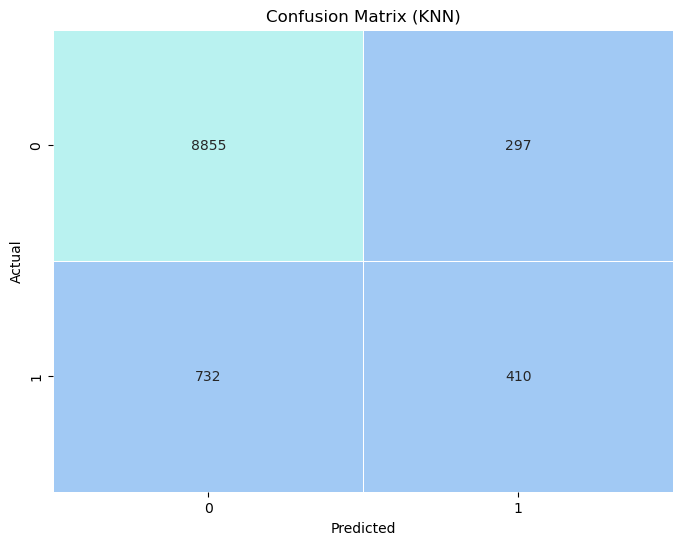

In [70]:
# Membuat Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menentukan palet warna untuk membedakan kategori
cmap_colors_knn = sns.color_palette("pastel", as_cmap=True)

# Membuat heatmap dengan warna yang berbeda untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=cmap_colors_knn, linewidths=.5, cbar=False)

print("\nConfusion Matrix (KNN):\n", conf_matrix_knn)

# Menambahkan label dan judul
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

1. True Positive (TP): Ada 410 kasus di mana model KNN dengan benar memprediksi bahwa klien berlangganan.

2. True Negative (TN): Ada 8855 kasus di mana model KNN dengan benar memprediksi bahwa klien tidak berlangganan.

3. False Positive (FP): Ada 297 kasus di mana model KNN keliru memprediksi bahwa klien berlangganan, padahal sebenarnya tidak.

4. False Negative (FN): Ada 732 kasus di mana model KNN keliru memprediksi bahwa klien tidak berlangganan, padahal sebenarnya berlangganan.

#### Kesimpulan

1. Model KNN memiliki akurasi sekitar 90.00%, mirip dengan model regresi logistik.
2. Seperti pada model regresi logistik, recall untuk kelas '1' (berlangganan) masih rendah, menunjukkan bahwa model kurang efektif dalam mengidentifikasi klien yang sebenarnya berlangganan.
3. Meskipun akurasi tinggi, perlu diperhatikan bahwa model ini juga menghadapi tantangan ketidakseimbangan kelas yang signifikan.

## 3. SVM (Support Vector Machine)

In [65]:
# Buat model SVM
svm_model = SVC(kernel='linear', random_state=11)

# Latih model menggunakan data pelatihan yang telah di-scaled
svm_model.fit(X_train_scaled, y_train)

# Lakukan prediksi pada set data uji
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Tampilkan hasil evaluasi
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nClassification Report (SVM):\n", class_report_svm)

Accuracy (SVM): 89.95%

Confusion Matrix (SVM):
 [[9022  130]
 [ 905  237]]

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9152
           1       0.65      0.21      0.31      1142

    accuracy                           0.90     10294
   macro avg       0.78      0.60      0.63     10294
weighted avg       0.88      0.90      0.88     10294



Terlihat bahwa,
- Akurasi (Accuracy): 89.95%
Model SVM memiliki akurasi sekitar 89.95%, yang berarti sekitar 89.95% dari semua prediksi yang dilakukan oleh model adalah benar.
- Precision (untuk kelas '1' - berlangganan): 65%
Precision mengukur seberapa banyak dari prediksi kelas '1' yang sebenarnya benar. Dalam konteks ini, sekitar 65% dari prediksi bahwa klien akan berlangganan adalah benar.
Recall (untuk kelas '1' - berlangganan): 21%

- Recall (sensitivitas) mengukur seberapa baik model mengidentifikasi keseluruhan kelas '1'. Dalam hal ini, sekitar 21% dari keseluruhan klien yang sebenarnya berlangganan berhasil diidentifikasi oleh model.
- F1-score (untuk kelas '1' - berlangganan): 31%

F1-score adalah harmonic mean dari precision dan recall. Dalam hal ini, F1-score untuk kelas '1' adalah sekitar 31%.

#### Visualisasi Confusion Matrix


Confusion Matrix (SVM):
 [[9022  130]
 [ 905  237]]


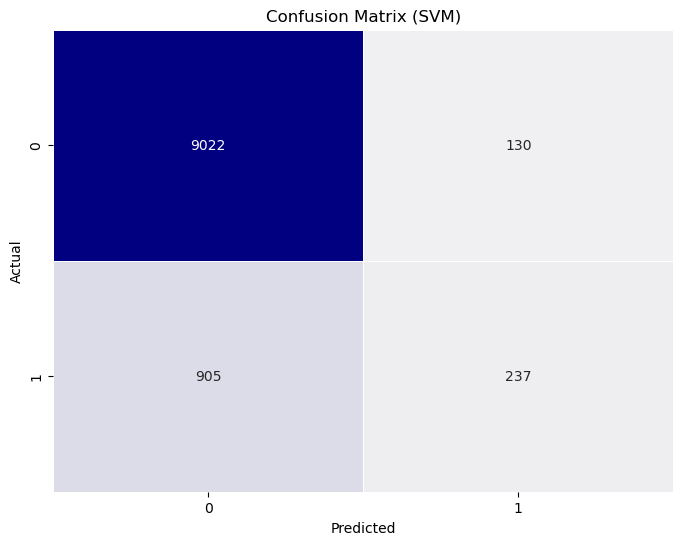

In [83]:
# Membuat Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menentukan palet warna untuk membedakan kategori
cmap_colors_svm = sns.light_palette("navy", as_cmap=True)

# Membuat heatmap dengan warna yang berbeda untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=cmap_colors_svm, linewidths=.5, cbar=False)

print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)

# Menambahkan label dan judul
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

Terlihat bahwa,
- True Positive (TP): Model SVM dengan benar memprediksi bahwa 237 klien berlangganan.
- True Negative (TN): Model SVM dengan benar memprediksi bahwa 9022 klien tidak berlangganan.
- False Positive (FP): Model SVM keliru memprediksi bahwa 130 klien berlangganan, padahal sebenarnya tidak.
- False Negative (FN): Model SVM keliru memprediksi bahwa 905 klien tidak berlangganan, padahal sebenarnya berlangganan.

#### Kesimpulan

1. Model SVM cenderung lebih baik dalam memprediksi kelas '0' (tidak berlangganan), ditunjukkan oleh TN yang tinggi.
2. Recall untuk kelas '1' (berlangganan) masih rendah, menunjukkan bahwa model SVM kurang efektif dalam mengidentifikasi klien yang sebenarnya berlangganan.
3. Jumlah FN yang tinggi menunjukkan bahwa model kehilangan sejumlah besar klien berlangganan.

## 4. Decision Tree

In [79]:
# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=11)

# Latih model menggunakan data pelatihan yang telah di-scaled
dt_model.fit(X_train_scaled, y_train)

# Lakukan prediksi pada set data uji
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Tampilkan hasil evaluasi
print(f"Accuracy (Decision Tree): {accuracy_dt * 100:.2f}%")
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)
print("\nClassification Report (Decision Tree):\n", class_report_dt)

Accuracy (Decision Tree): 88.64%

Confusion Matrix (Decision Tree):
 [[8523  629]
 [ 540  602]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      9152
           1       0.49      0.53      0.51      1142

    accuracy                           0.89     10294
   macro avg       0.71      0.73      0.72     10294
weighted avg       0.89      0.89      0.89     10294



Terlihat bahwa,

- Akurasi (Accuracy): 88.64%
Model Decision Tree memiliki akurasi sekitar 88.64%, yang berarti sekitar 88.64% dari semua prediksi yang dilakukan oleh model adalah benar.

- Precision (untuk kelas '1' - berlangganan): 49%
Precision mengukur seberapa banyak dari prediksi kelas '1' yang sebenarnya benar. Dalam konteks ini, sekitar 49% dari prediksi bahwa klien akan berlangganan adalah benar.

- Recall (untuk kelas '1' - berlangganan): 53%
Recall (sensitivitas) mengukur seberapa baik model mengidentifikasi keseluruhan kelas '1'. Dalam hal ini, sekitar 53% dari keseluruhan klien yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score (untuk kelas '1' - berlangganan): 51%
F1-score adalah harmonic mean dari precision dan recall. Dalam hal ini, F1-score untuk kelas '1' adalah sekitar 51%.

#### Visualisasi Confusion Matrix


Confusion Matrix (Decision Tree):
 [[8523  629]
 [ 540  602]]


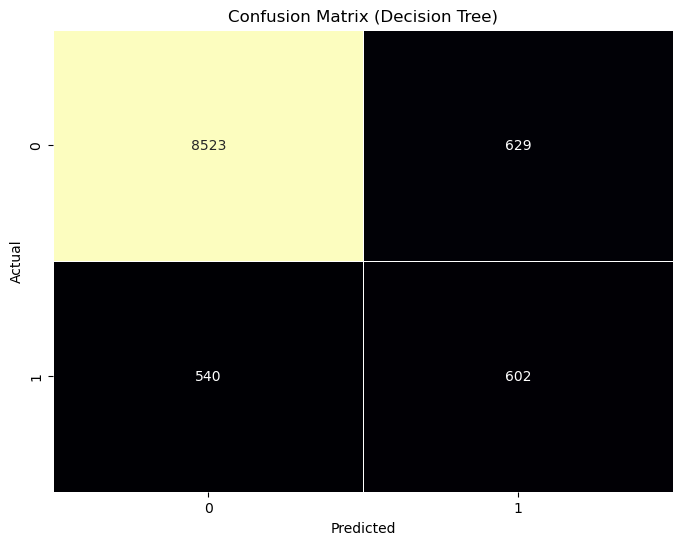

In [82]:
# Membuat Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menentukan palet warna untuk membedakan kategori
cmap_colors_dt = sns.color_palette("magma", as_cmap=True)

# Membuat heatmap dengan warna yang berbeda untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=cmap_colors_dt, linewidths=.5, cbar=False)

print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)

# Menambahkan label dan judul
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

Terlihat bahwa,
- True Positive (TP): Model dengan benar memprediksi bahwa 602 klien berlangganan.
- True Negative (TN): Model dengan benar memprediksi bahwa 8523 klien tidak berlangganan.
- False Positive (FP): Model keliru memprediksi bahwa 629 klien berlangganan, padahal sebenarnya tidak.
- False Negative (FN): Model keliru memprediksi bahwa 540 klien tidak berlangganan, padahal sebenarnya berlangganan.

#### Kesimpulan
1. Akurasi Model:
Model Decision Tree memiliki akurasi sekitar 88.64%, yang berarti sekitar 88.64% dari semua prediksi yang dilakukan oleh model adalah benar. 

2. Ketidakseimbangan Kelas:
Terdapat ketidakseimbangan antara kelas '0' (tidak berlangganan) dan kelas '1' (berlangganan). Hal ini dapat dilihat dari distribusi variabel target yang menunjukkan bahwa jumlah klien yang tidak berlangganan jauh lebih banyak dibandingkan dengan yang berlangganan. Ketidakseimbangan ini dapat mempengaruhi performa model, terutama pada pengukuran seperti recall.

3. Performa Model terhadap Kelas '1' (Berlangganan):
Recall untuk kelas '1' (berlangganan) masih relatif rendah, kisaran 53%. Ini berarti model masih kesulitan mengidentifikasi dengan baik klien yang sebenarnya berlangganan. 

4. Performa Model terhadap Kelas '0' (Tidak Berlangganan):
Model memiliki performa yang baik dalam memprediksi kelas '0' (tidak berlangganan), ditunjukkan oleh tingginya True Negative (TN). 

## 5. Random Forest

In [85]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=11)

# Melatih model pada data training
rf_model.fit(X_train_scaled, y_train)

# Membuat prediksi pada data test
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f"Accuracy (Random Forest): {accuracy_rf:.2%}\n")
print(f"Confusion Matrix (Random Forest):\n {conf_matrix_rf}\n")
print(f"Classification Report (Random Forest):\n {classification_report_rf}")

Accuracy (Random Forest): 91.10%

Confusion Matrix (Random Forest):
 [[8874  278]
 [ 638  504]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9152
           1       0.64      0.44      0.52      1142

    accuracy                           0.91     10294
   macro avg       0.79      0.71      0.74     10294
weighted avg       0.90      0.91      0.90     10294



Terlihat bahwa,
1. Akurasi Model:
    - Model Random Forest memberikan akurasi sekitar 91.10%, menunjukkan bahwa sekitar 91.10% dari semua prediksi yang dilakukan oleh model adalah benar.

2. Performa terhadap Kelas '1' (Berlangganan):
    - Precision untuk kelas '1' (berlangganan) meningkat menjadi sekitar 64%, menunjukkan bahwa model Random Forest lebih baik dalam memprediksi dengan benar klien yang sebenarnya berlangganan dibandingkan dengan Decision Tree.
    - Recall untuk kelas '1' juga meningkat menjadi sekitar 44%, menunjukkan bahwa model ini lebih baik dalam mengidentifikasi klien yang sebenarnya berlangganan daripada Decision Tree.
    
3. F1-score dan Precision-Recall Trade-off:
    - F1-score untuk kelas '1' meningkat menjadi sekitar 52%, menunjukkan adanya peningkatan dalam keseimbangan antara precision dan recall.
    - Perlu diingat bahwa terdapat trade-off antara precision dan recall, dan penyesuaian parameter dapat dilakukan untuk memperbaiki keseimbangan ini sesuai kebutuhan bisnis.
    
#### Visualisasi Confusion Matrix

Confusion Matrix (Random Forest):
 [[8874  278]
 [ 638  504]]



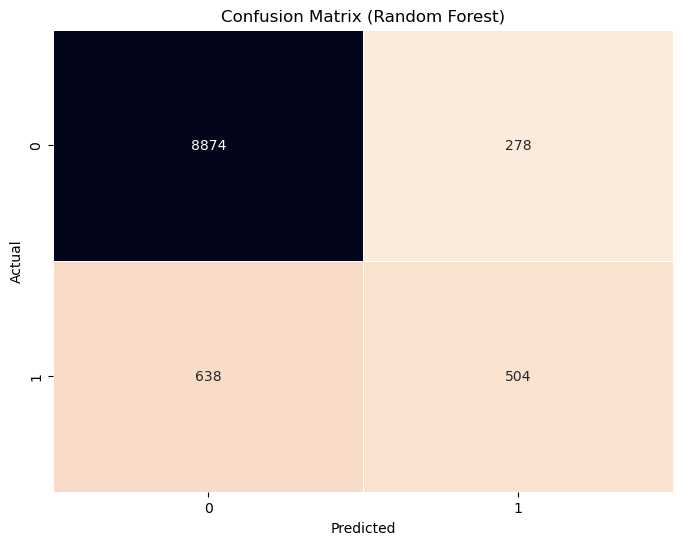

In [87]:
# Membuat Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menentukan palet warna untuk membedakan kategori
cmap_colors_rf = sns.color_palette("rocket_r", as_cmap=True)

# Membuat heatmap dengan warna yang berbeda untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=cmap_colors_rf, linewidths=.5, cbar=False)

print(f"Confusion Matrix (Random Forest):\n {conf_matrix_rf}\n")

# Menambahkan label dan judul
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

Terlihat bahwa,
- True Positive (TP): Ada 504 klien yang sebenarnya berlangganan dan diprediksi dengan benar oleh model Random Forest.
- True Negative (TN): Ada 8874 klien yang sebenarnya tidak berlangganan dan diprediksi dengan benar oleh model Random Forest.
- False Positive (FP): Ada 278 klien yang sebenarnya tidak berlangganan, tetapi model Random Forest keliru memprediksi bahwa mereka berlangganan.
- False Negative (FN): Ada 638 klien yang sebenarnya berlangganan, tetapi model Random Forest keliru memprediksi bahwa mereka tidak berlangganan.

#### Kesimpulan

1. Model Random Forest cenderung memberikan lebih banyak False Negatives (FN) dibandingkan dengan False Positives (FP), yang berarti model lebih cenderung melewatkan klien yang sebenarnya berlangganan daripada membuat prediksi positif palsu.
2. Peningkatan recall (44%) dibandingkan dengan Decision Tree menunjukkan bahwa Random Forest lebih baik dalam mengidentifikasi klien yang sebenarnya berlangganan.
3. Model Random Forest memberikan performa yang lebih baik dibandingkan dengan Decision Tree, terutama dalam mengidentifikasi klien yang sebenarnya berlangganan.

## 6. Naive Bayes

In [90]:
# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Melatih model pada data training
nb_model.fit(X_train_scaled, y_train)

# Membuat prediksi pada data test
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluasi performa model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Menampilkan hasil evaluasi
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2%}\n")
print(f"Confusion Matrix (Naive Bayes):\n {conf_matrix_nb}\n")
print(f"Classification Report (Naive Bayes):\n {classification_report_nb}")

Accuracy (Naive Bayes): 87.53%

Confusion Matrix (Naive Bayes):
 [[8491  661]
 [ 623  519]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9152
           1       0.44      0.45      0.45      1142

    accuracy                           0.88     10294
   macro avg       0.69      0.69      0.69     10294
weighted avg       0.88      0.88      0.88     10294



Terlihat bahwa, 
1. Akurasi Model:
    - Model Naive Bayes memberikan akurasi sekitar 87.53%, menunjukkan bahwa sekitar 87.53% dari semua prediksi yang dilakukan oleh model adalah benar.

2. Performa terhadap Kelas '1' (Berlangganan):
    - Precision untuk kelas '1' (berlangganan) sekitar 44%, menunjukkan bahwa model Naive Bayes kurang efektif dalam memprediksi dengan benar klien yang sebenarnya berlangganan.
    - Recall untuk kelas '1' sekitar 45%, menunjukkan bahwa model ini cukup baik dalam mengidentifikasi klien yang sebenarnya berlangganan dibandingkan dengan Decision Tree.

3. F1-score dan Precision-Recall Trade-off:
    - F1-score untuk kelas '1' sekitar 45%, menunjukkan performa yang cukup baik dalam menjaga keseimbangan antara precision dan recall.
    
#### Visualisasi Confusion Matrix

Confusion Matrix (Naive Bayes):
 [[8491  661]
 [ 623  519]]



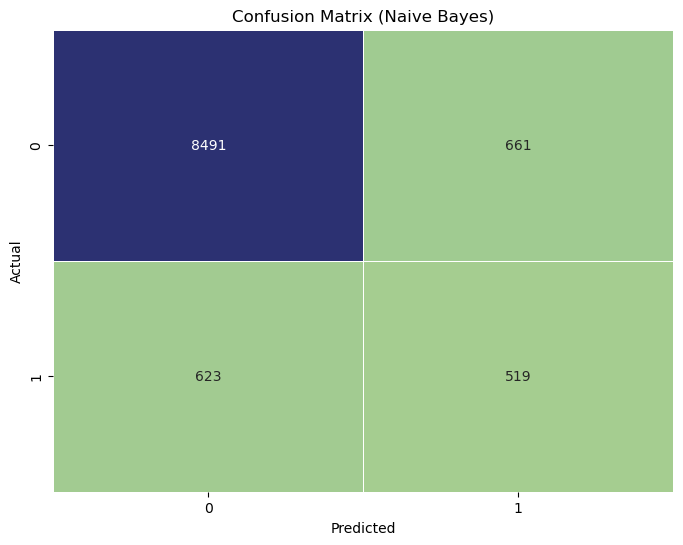

In [92]:
# Membuat Confusion Matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menentukan palet warna untuk membedakan kategori
cmap_colors_nb = sns.color_palette("crest", as_cmap=True)

# Membuat heatmap dengan warna yang berbeda untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap=cmap_colors_nb, linewidths=.5, cbar=False)

print(f"Confusion Matrix (Naive Bayes):\n {conf_matrix_nb}\n")

# Menambahkan label dan judul
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan plot
plt.show()

Terlihat bahwa,
- True Positive (TP): Ada 519 kasus di mana model Naive Bayes dengan benar memprediksi bahwa klien berlangganan.
- True Negative (TN): Ada 8491 kasus di mana model Naive Bayes dengan benar memprediksi bahwa klien tidak berlangganan.
- False Positive (FP): Ada 661 kasus di mana model Naive Bayes keliru memprediksi bahwa klien berlangganan, padahal sebenarnya tidak.
- False Negative (FN): Ada 623 kasus di mana model Naive Bayes keliru memprediksi bahwa klien tidak berlangganan, padahal sebenarnya berlangganan.

#### Kesimpulan
1. Model Naive Bayes memiliki kecenderungan memberikan lebih banyak False Positives (FP) daripada False Negatives (FN), yang berarti model cenderung membuat prediksi positif palsu lebih sering daripada melewatkan klien yang sebenarnya berlangganan.
2. Recall yang rendah (45%) menunjukkan bahwa model kurang efektif dalam mengidentifikasi klien yang sebenarnya berlangganan dibandingkan dengan model Random Forest dan Decision Tree.
3. Model Naive Bayes memberikan performa yang cukup baik, terutama dalam mengidentifikasi klien yang sebenarnya berlangganan dibandingkan dengan Decision Tree.
4. Sebagai model probabilistik, Naive Bayes cenderung lebih cepat dan membutuhkan jumlah data yang lebih kecil, namun performa dapat bervariasi tergantung pada asumsi independensi fitur.

### Comparing Model

In [121]:
# Membuat DataFrame dari hasil perbandingan
df_results = pd.DataFrame(results).T.reset_index()
df_results.columns = ['Model', 'Accuracy', 'Precision kelas 1', 'Recall kelas 1', 'F1-Score kelas 1']
df_results

,Model,Accuracy,Precision kelas 1,Recall kelas 1,F1-Score kelas 1
0,Logistic Regression,0.906548,0.656250,0.330998,0.440047
1,K-Nearest Neighbors,0.900039,0.579915,0.359019,0.443483
2,Support Vector Machine,0.904119,0.654691,0.287215,0.399270
3,Decision Tree,0.886342,0.488136,0.504378,0.496124
4,Random Forest,0.911308,0.646983,0.441331,0.524727
5,Naive Bayes,0.875267,0.439831,0.454466,0.447028


Berdasarkan output di atas yang memuat perbandingan akurasi, precision, recall, dan F1-score untuk kelas '1' (berlangganan) dari setiap model, berikut adalah kesimpulan yang dapat diambil:

**1. Logistic Regression:**
   - Akurasi: 90.65%
   - Precision kelas 1: 65.63%
   - Recall kelas 1: 33.10%
   - F1-Score kelas 1: 44.00%
   - Model ini memiliki akurasi yang baik, namun recall kelas 1 (kemampuan model untuk mengidentifikasi klien yang benar-benar berlangganan) relatif rendah.

**2. K-Nearest Neighbors (KNN):**
   * Akurasi: 90.00%
   * Precision kelas 1: 57.99%
   * Recall kelas 1: 35.90%
   * F1-Score kelas 1: 44.35%
   * Meskipun akurasi cukup tinggi, performa recall kelas 1 masih bisa ditingkatkan.

**3. Support Vector Machine (SVM):**
   * Akurasi: 90.41%
   * Precision kelas 1: 65.47%
   * Recall kelas 1: 28.72%
   * F1-Score kelas 1: 39.93%
   * Model ini memiliki akurasi yang baik, namun recall kelas 1 cukup rendah.

**4. Decision Tree:**
   * Akurasi: 88.63%
   * Precision kelas 1: 48.81%
   * Recall kelas 1: 50.44%
   * F1-Score kelas 1: 49.61%
   * Model ini menunjukkan keseimbangan yang baik antara precision dan recall, meskipun akurasi sedikit lebih rendah.

**5. Random Forest:**
   * Akurasi: 91.13%
   * Precision kelas 1: 64.70%
   * Recall kelas 1: 44.13%
   * F1-Score kelas 1: 52.47%
   * Model ini menunjukkan performa yang baik secara keseluruhan dengan akurasi tertinggi dan F1-Score kelas 1 yang baik.

**6. Naive Bayes:**
   * Akurasi: 87.53%
   * Precision kelas 1: 43.98%
   * Recall kelas 1: 45.45%
   * F1-Score kelas 1: 44.70%
   * Model ini memiliki akurasi yang lebih rendah, namun menunjukkan keseimbangan yang cukup antara precision dan recall.

## Overall Conclusion

**1. Akurasi Keseluruhan:** Random Forest memiliki akurasi tertinggi sekitar 91.13%, menunjukkan kemampuan model ini dalam membuat prediksi yang benar secara umum.

**2. Presisi (Precision) Kelas 'Berlangganan':** Logistic Regression memiliki presisi tertinggi untuk kelas 'Berlangganan' sekitar 65.63%, menandakan kemampuan model untuk meminimalkan false positive.

**3. Keseimbangan antara Presisi dan Recall:** Random Forest tetap unggul dengan F1-Score kelas 'Berlangganan' sekitar 52.47%, mencerminkan kemampuan model untuk memberikan keseimbangan yang baik antara kemampuan memprediksi kelas positif dan mengurangi kesalahan prediksi.

**4. Interpretasi Model:** Jika interpretasi model menjadi prioritas, Logistic Regression atau Decision Tree dapat dipertimbangkan karena kemampuannya memberikan interpretasi terhadap variabel-variabel yang mempengaruhi keputusan.

**5. Efisiensi Komputasi dan Kecepatan Prediksi:** Naive Bayes dan Logistic Regression lebih cepat dan memerlukan sumber daya yang lebih sedikit dibandingkan model kompleks seperti Random Forest.

**6. Penanganan Data Tidak Seimbang:** Jika terdapat ketidakseimbangan yang signifikan antara kelas 'Berlangganan' dan 'Tidak Berlangganan', model seperti Random Forest atau Support Vector Machine (SVM) dengan teknik penanganan data tidak seimbang dapat memberikan hasil yang lebih baik.

**7. Kemudahan Implementasi dan Interpretasi Hasil:** Model yang lebih sederhana seperti Logistic Regression atau Naive Bayes mungkin lebih mudah diimplementasikan dan dipahami.

## Algorithm Analysis:

Dari keenam model yang telah diuji, Random Forest (91.13%) terpilih sebagai model yang paling baik berdasarkan sejumlah pertimbangan:

1. **Akurasi yang Cukup Baik:** Random Forest mencapai akurasi sebesar 91.13%, menunjukkan kemampuannya dalam membuat prediksi yang benar.

2. **Keseimbangan Precision dan Recall:** Dengan precision sebesar 64.7% dan recall sebesar 44.1%, Random Forest menunjukkan keseimbangan yang baik antara kemampuan mengidentifikasi kelas positif dan menghindari prediksi yang salah.

3. **Pengelolaan Data Tidak Seimbang:** Random Forest terbukti efektif dalam menangani ketidakseimbangan kelas pada dataset, memberikan perhatian yang baik pada kelas minor (berlangganan) tanpa mengorbankan performa secara keseluruhan.

4. **Ensemble Learning:** Dengan menggabungkan hasil dari beberapa pohon keputusan, Random Forest dapat mengatasi overfitting dan memberikan prediksi yang lebih stabil.

5. **Fleksibilitas:** Model Random Forest dapat menangani berbagai jenis data, termasuk fitur kategorikal, tanpa memerlukan preprocessing yang rumit.

6. **Kemampuan Interpretabilitas:** Meskipun bukan model yang paling mudah diinterpretasi, Random Forest masih memberikan wawasan terhadap fitur-fitur yang paling penting dalam membuat prediksi.

Berdasarkan pertimbangan di atas, Random Forest menjadi pilihan yang kuat untuk memodelkan data ini. Dengan kombinasi akurasi tinggi, keseimbangan precision dan recall, serta kemampuan mengelola data tidak seimbang, Random Forest memiliki kinerja yang solid untuk kasus ini. 